# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0


## Data Inspection

In [3]:
# Check column names in case 
# we need to do some spelling correction
dataset.columns

Index(['RID', 'Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m',
       'HipsASMbaseline', 'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [4]:
# Check dataset overall information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RID                         608 non-null    int64  
 1   Gender                      608 non-null    int64  
 2   Ageatscreening              608 non-null    float64
 3   Diagnosis                   608 non-null    int64  
 4   MMSE0m                      605 non-null    float64
 5   HipsASMbaseline             583 non-null    float64
 6   HipsContrastbaseline        594 non-null    float64
 7   HipsCorelationbaseline      588 non-null    float64
 8   HipsVariancebaseline        600 non-null    float64
 9   HipsSumAveragebaseline      607 non-null    float64
 10  HipsSumVariancebaseline     601 non-null    float64
 11  HipsEntropybaseline         585 non-null    float64
 12  HipsClusterShadebaseline    590 non-null    float64
 13  ERCsASMbaseline             604 non

In [5]:
# Check for nulls
dataset.isna().sum()

RID                            0
Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         3
HipsASMbaseline               25
HipsContrastbaseline          14
HipsCorelationbaseline        20
HipsVariancebaseline           8
HipsSumAveragebaseline         1
HipsSumVariancebaseline        7
HipsEntropybaseline           23
HipsClusterShadebaseline      18
ERCsASMbaseline                4
ERCsContrastbaseline          18
ERCsCorelationbaseline        28
ERCsVariancebaseline          14
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       13
ERCsEntropybaseline            9
ERCsClusterShadebaseline      34
ERCs_thicknessbaseline        37
ERCsVolumebaseline            14
HipposcampusVolumebaseline    19
dtype: int64

In [6]:
null_dataset = dataset.dropna()
null_dataset

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0
5,14,1,78.6137,0,29.0,0.12,188.33,0.49,183.76,39.63,...,241.64,0.44,226.48,35.11,664.29,3.10,8478.33,3.01,1809.0,3292.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
604,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
605,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
606,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


## Target analysis

Lets have a quick look at the target

In [7]:
null_dataset["Diagnosis"].value_counts().sort_index()

Diagnosis
0    130
1    162
2     59
3     94
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

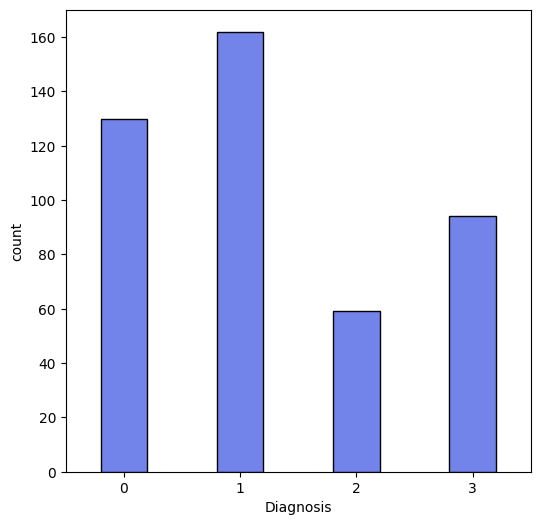

In [10]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = null_dataset, 
              x = null_dataset["Diagnosis"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black",
)

*We can see at first glance that we have an imbalance dataset.*

**Lets have a closer look on whether our variables in the dataset do follow a normal distribution and its Skewness level.**

* We use the Shapiro-Wilk test to assess whether the data in each column follows a normal distribution. p-value: The probability that the data comes from a normal distribution. A p-value greater than 0.05 suggests the data is normal, while less than 0.05 suggests it is not normal.

* If skewness is 0, the data is perfectly symmetric. Negative skewness means the left tail is longer (data is skewed left), and positive skewness means the right tail is longer (data is skewed right).

* A kurtosis of 3 indicates a normal distribution. If kurtosis is greater than 3, it indicates heavier tails (leptokurtic), and if it's less than 3, it indicates lighter tails (platykurtic).

*In this case, scipy wouldnt allow me to work with null values, therefore, I had to drop them initially. This will be taken into consideration when performing data imputation and re-assess the dataset for completeness.*

In [11]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in null_dataset.columns:  
    stat, p = shapiro(null_dataset[column].dropna())
    skewness = skew(null_dataset[column].dropna())
    kurt = kurtosis(null_dataset[column].dropna())
    results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,Statistic,p-value,Skewness,Kurtosis,Normal
RID,0.959336,0.0,-0.13665,-1.108116,False
Gender,0.633127,0.0,0.194167,-1.962299,False
Ageatscreening,0.98705,0.000541,-0.346848,-0.028512,False
Diagnosis,0.833823,0.0,0.429692,-1.12158,False
MMSE0m,0.916783,0.0,-0.805036,0.272834,False
HipsASMbaseline,0.969628,0.0,0.447806,-0.319825,False
HipsContrastbaseline,0.996738,0.511399,0.133266,-0.092726,True
HipsCorelationbaseline,0.970326,0.0,-0.518323,-0.103093,False
HipsVariancebaseline,0.950334,0.0,-0.66261,-0.29868,False
HipsSumAveragebaseline,0.984968,0.000145,0.070317,-0.710312,False


It appears that HipsContrastbaseline and ERCsEntropybaseline do indicate a normal distribution 

How about we visuallize them for clarity? Lets use histograms

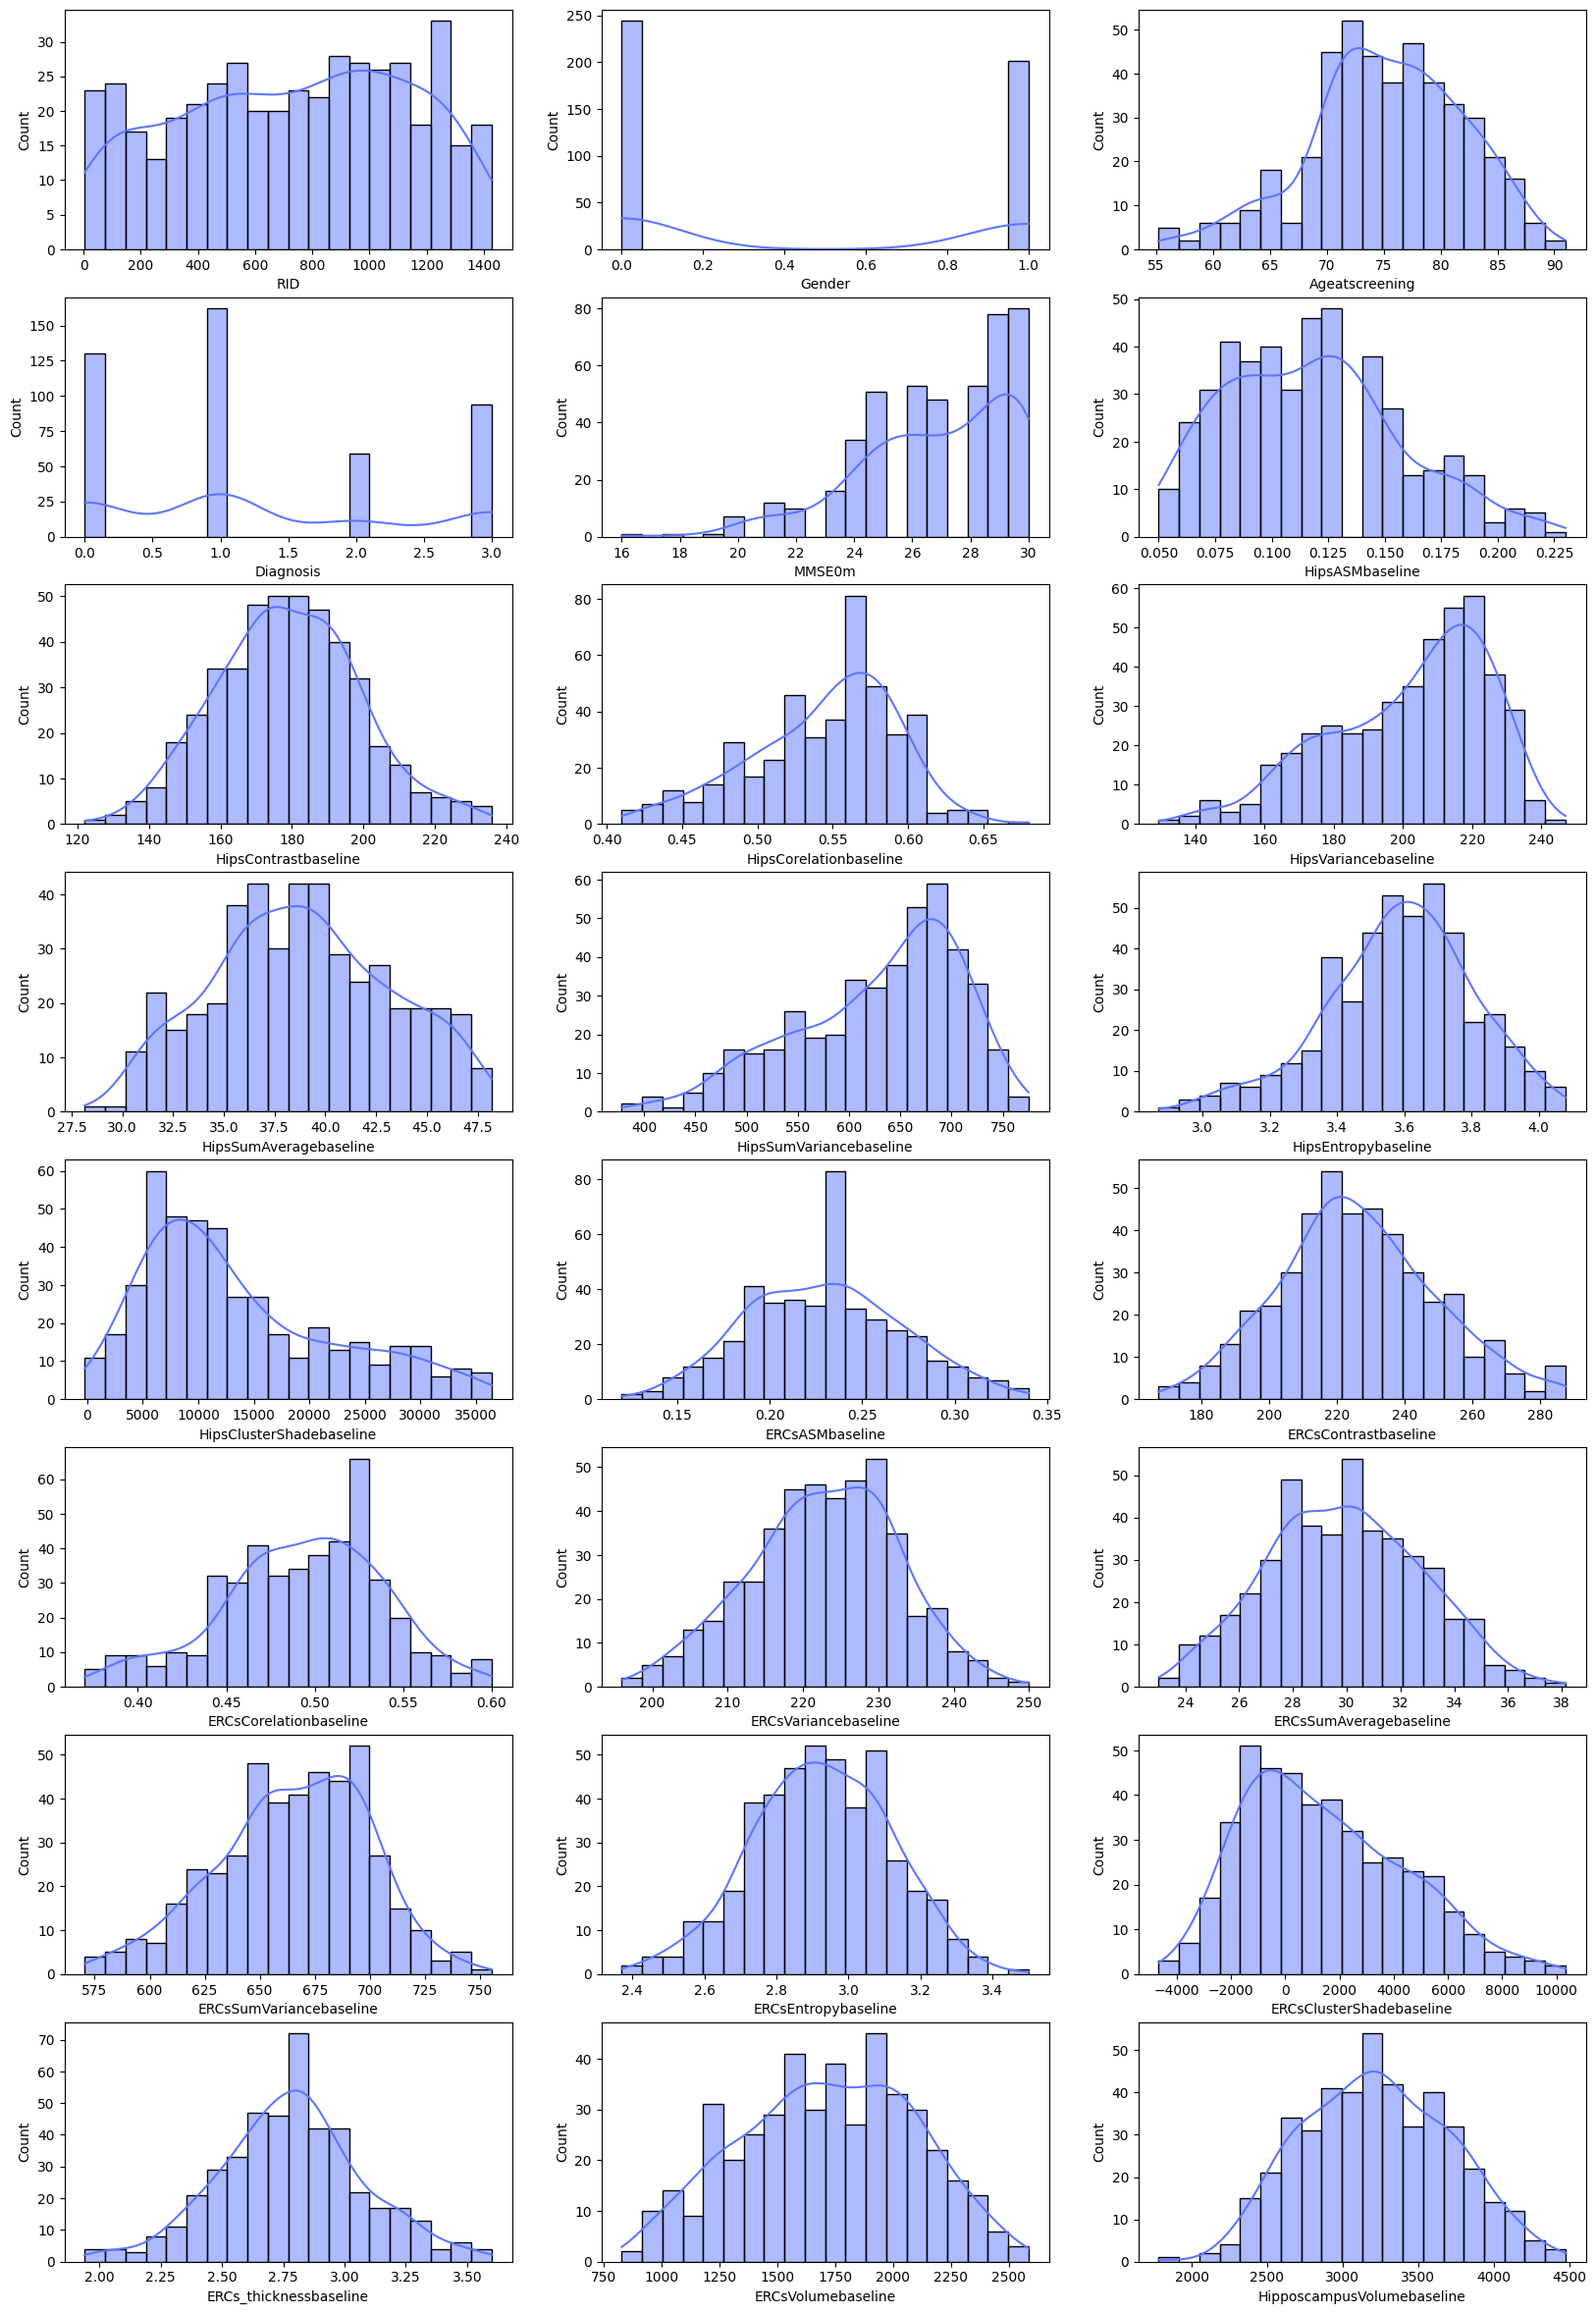

In [12]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(null_dataset.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(null_dataset[null_dataset.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black",
                 bins=20)

Now we want to check for any outliers. How about we use boxplots?

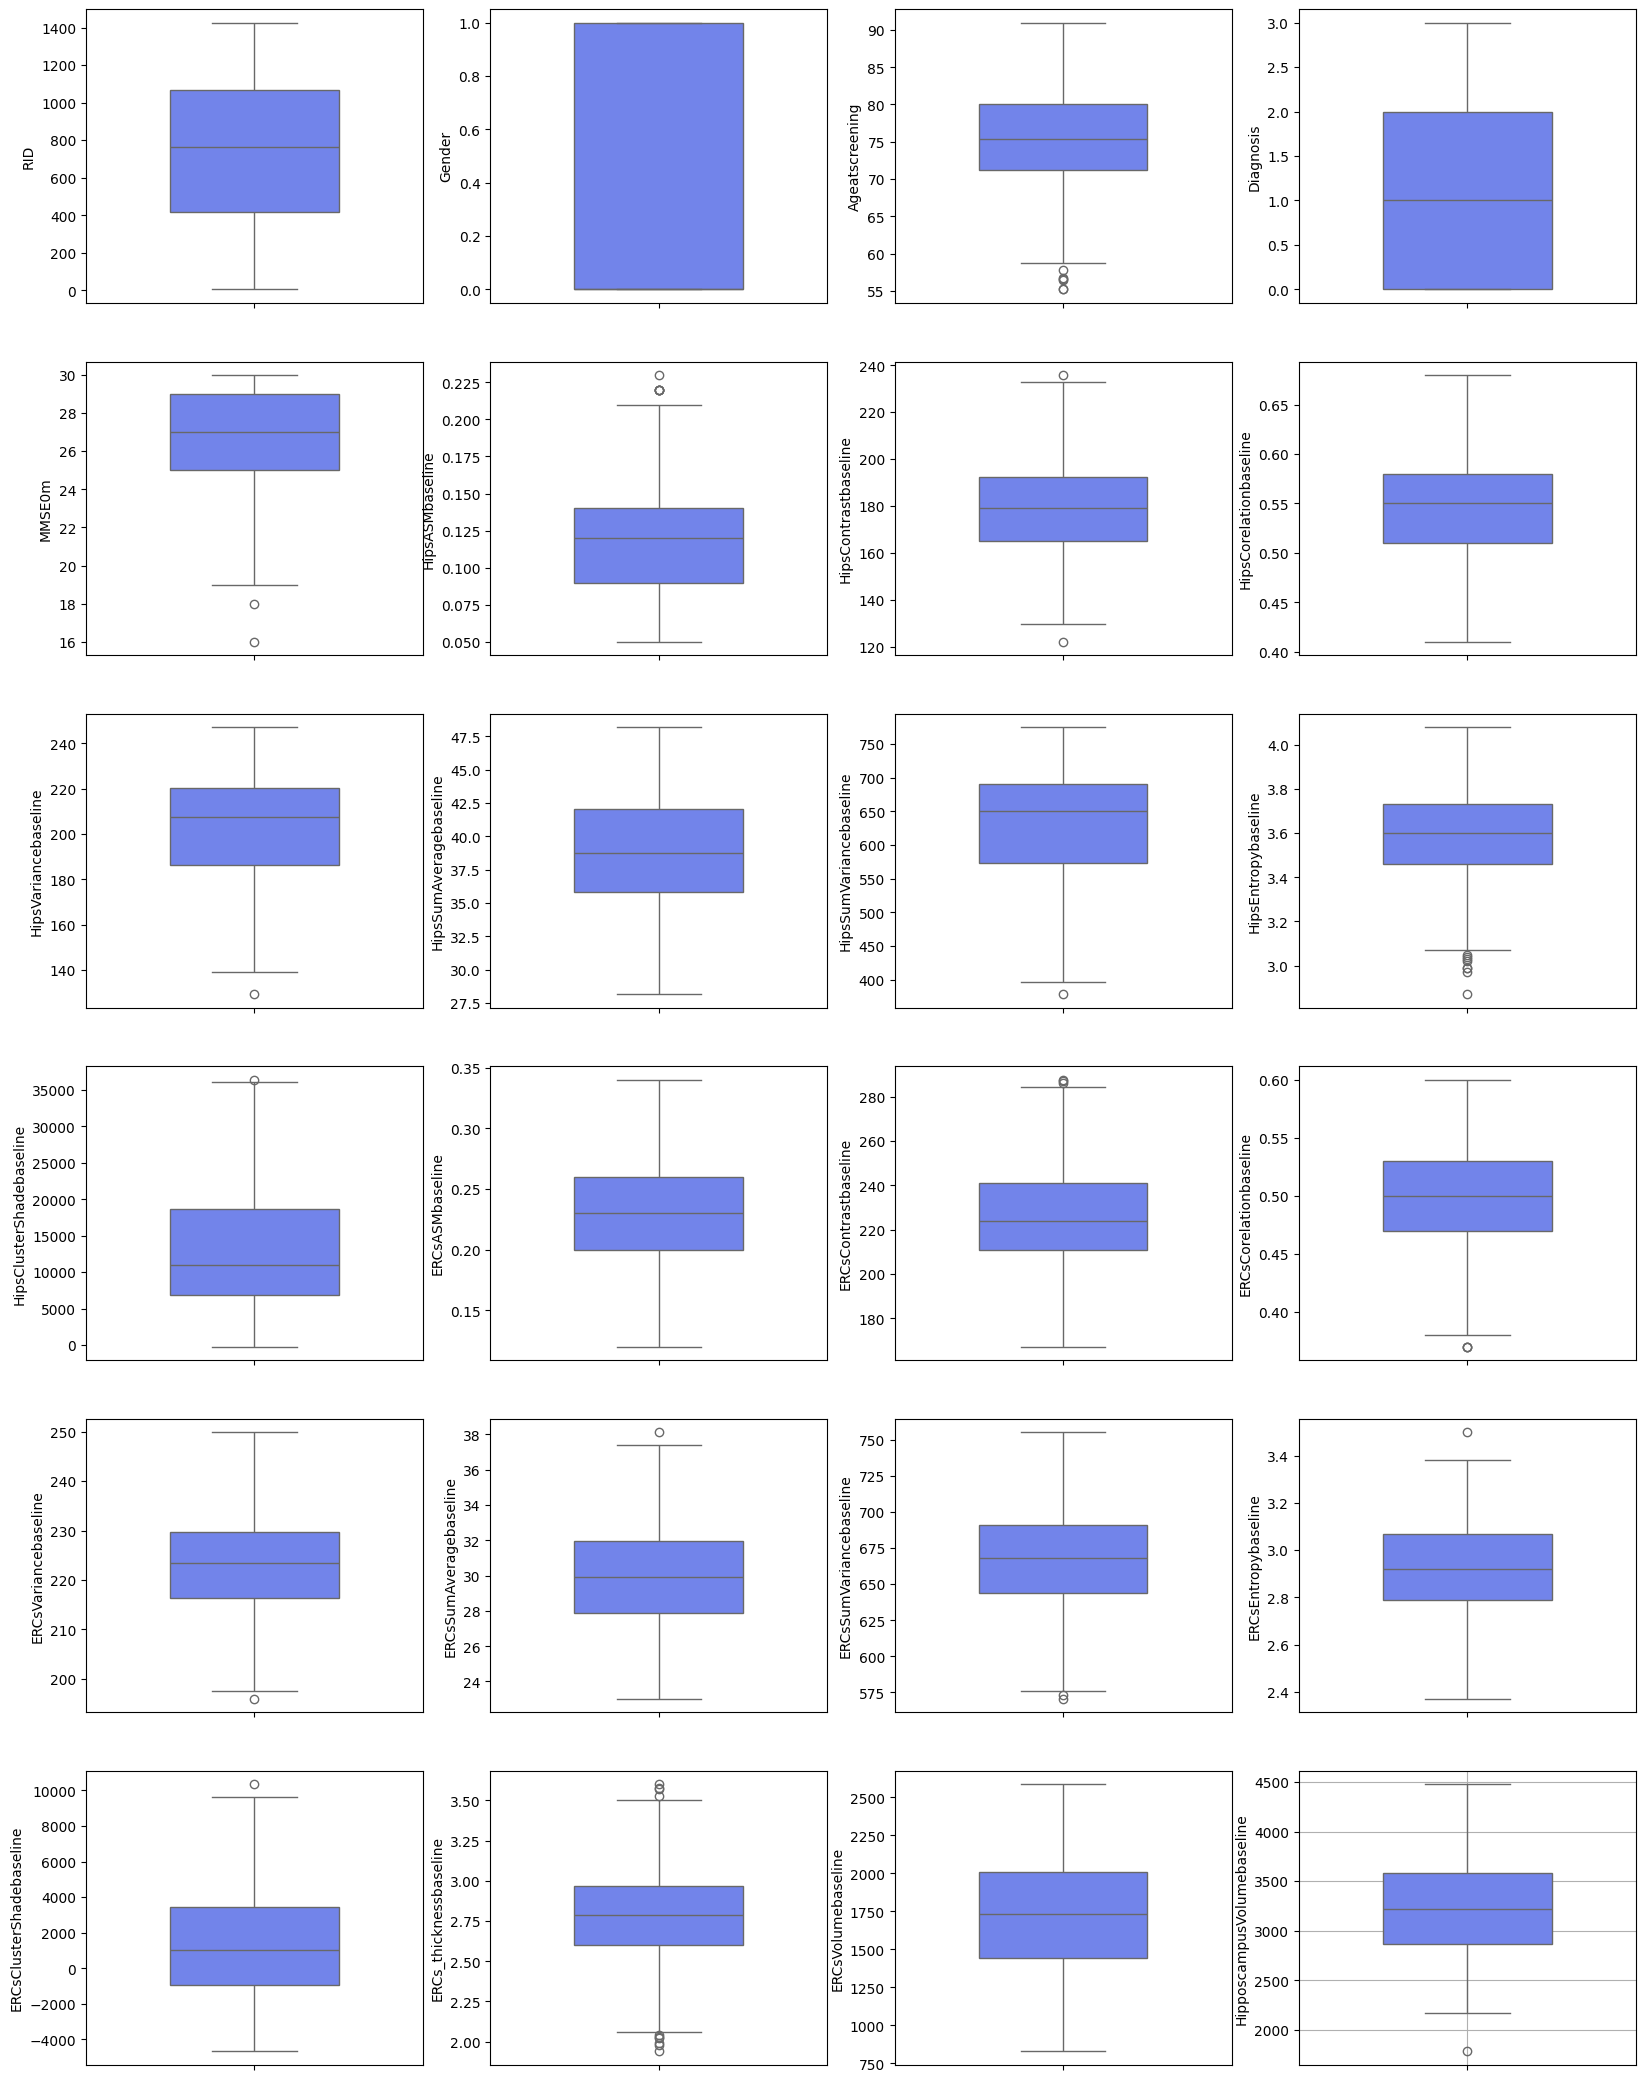

In [13]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(null_dataset.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(null_dataset[null_dataset.columns[i]], 
                color="#5e76fe",
                width=.5)
plt.grid()

We can now better understand the spread of our dataset and detect a few outliers from here. 

How about we check the Q-Q plot for each variable? Perhaps we can have a much better comprehension if the data follows a normal distribution aside from relying on the above histogram.

Note: *Q-Q plots rely on the complete dataset to compute quantiles. Therefore, i had to drop a few values to see the red line*

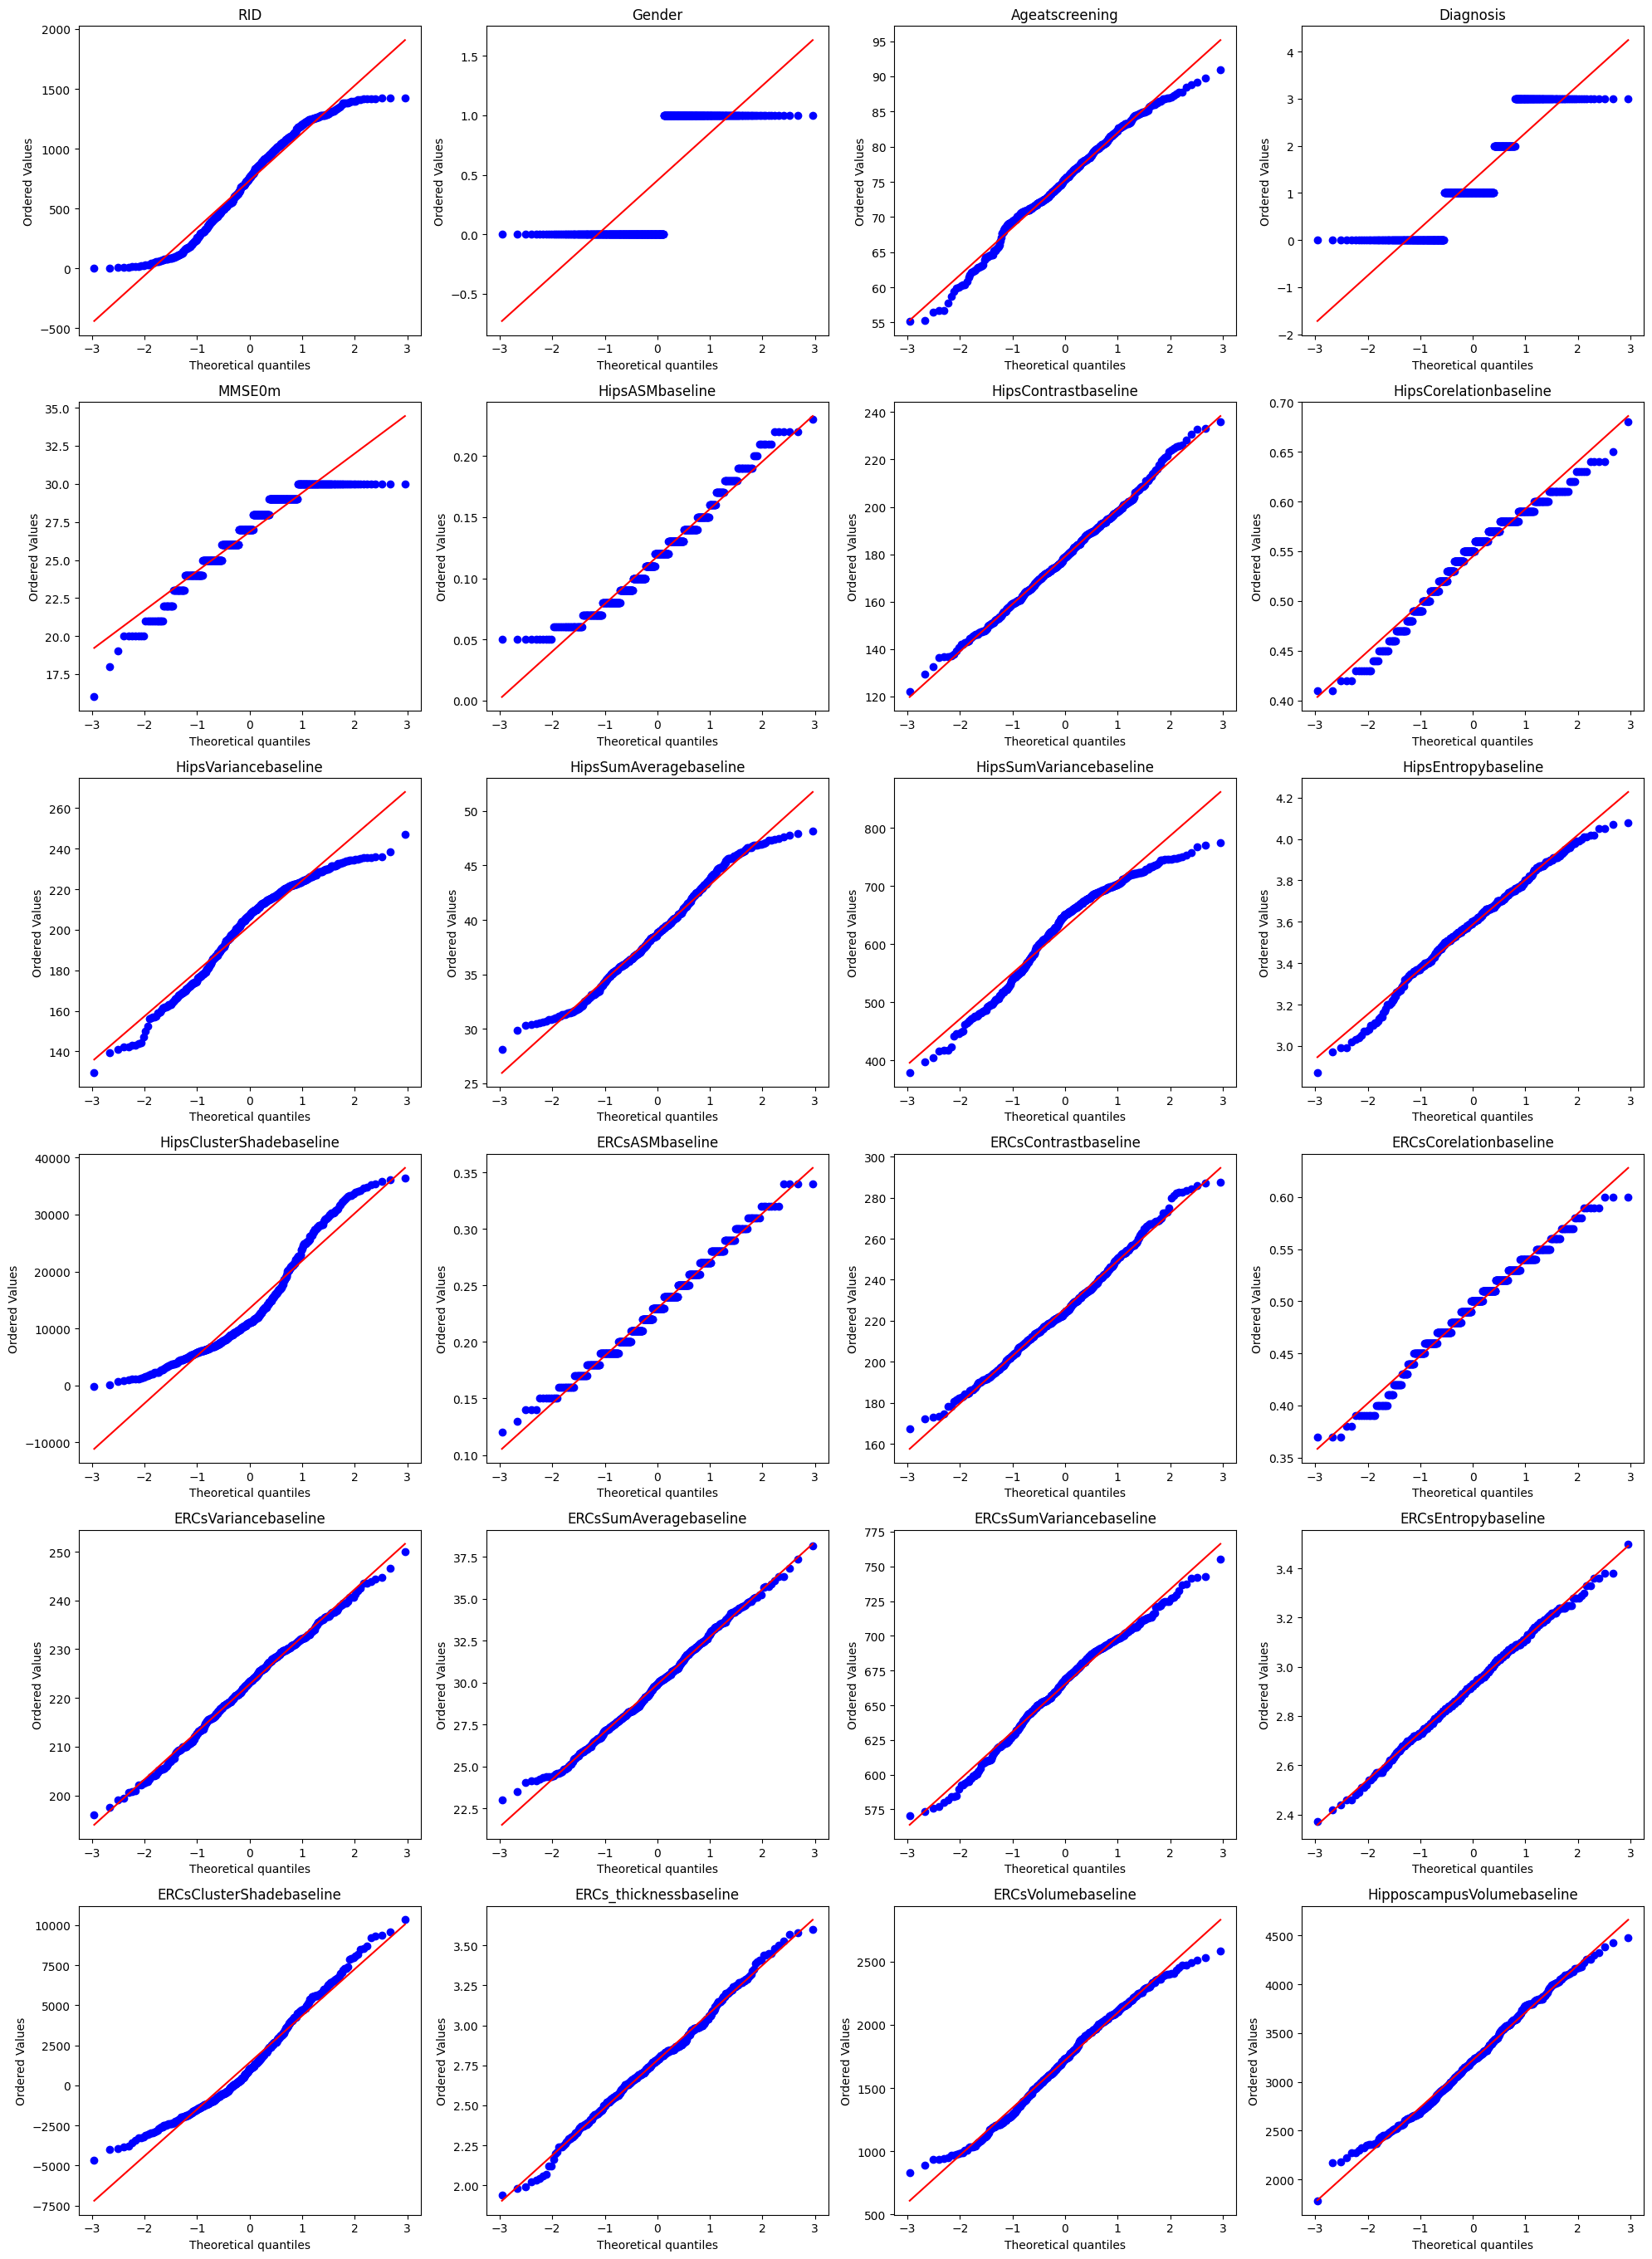

In [14]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(null_dataset.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(null_dataset[null_dataset.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(null_dataset.columns[i])

plt.tight_layout()

 Interesing, perhaps the distribution may change if we perform data imputation? If thats the case, then we may need to perform data transformation.

In [15]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in null_dataset.columns:  
    stat, p = shapiro(null_dataset[column].dropna())
    skewness = skew(null_dataset[column].dropna())
    kurt = kurtosis(null_dataset[column].dropna())
    results[column] = {'p-value': p, 'Normal': p > 0.05, 'Skewness': skewness, 'Kurtosis': kurt} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,p-value,Normal,Skewness,Kurtosis
RID,0.0,False,-0.13665,-1.108116
Gender,0.0,False,0.194167,-1.962299
Ageatscreening,0.000541,False,-0.346848,-0.028512
Diagnosis,0.0,False,0.429692,-1.12158
MMSE0m,0.0,False,-0.805036,0.272834
HipsASMbaseline,0.0,False,0.447806,-0.319825
HipsContrastbaseline,0.511399,True,0.133266,-0.092726
HipsCorelationbaseline,0.0,False,-0.518323,-0.103093
HipsVariancebaseline,0.0,False,-0.66261,-0.29868
HipsSumAveragebaseline,0.000145,False,0.070317,-0.710312
